In [3]:
from stable_baselines import DDPG
import seagul.envs

import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

import numpy as np
import matplotlib.pyplot as plt

env_name = 'su_cartpole-v0'
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

model = DDPG('MlpPolicy', env, verbose=1)
model.learn(1000000)


---------------------------------------
| reference_Q_mean        | -9.52     |
| reference_Q_std         | 6.58      |
| reference_action_mean   | -1        |
| reference_action_std    | 0.000709  |
| reference_actor_Q_mean  | -9.32     |
| reference_actor_Q_std   | 6.67      |
| rollout/Q_mean          | -3.25     |
| rollout/actions_mean    | -0.645    |
| rollout/actions_std     | 0.686     |
| rollout/episode_steps   | 1.5e+03   |
| rollout/episodes        | 6         |
| rollout/return          | -5.09e+03 |
| rollout/return_history  | -5.09e+03 |
| total/duration          | 29.6      |
| total/episodes          | 6         |
| total/epochs            | 1         |
| total/steps             | 9998      |
| total/steps_per_second  | 338       |
| train/loss_actor        | 9.41      |
| train/loss_critic       | 3.34      |
| train/param_noise_di... | 0         |
---------------------------------------

---------------------------------------
| reference_Q_mean        | -23.6     |

1499
[863.92437893]


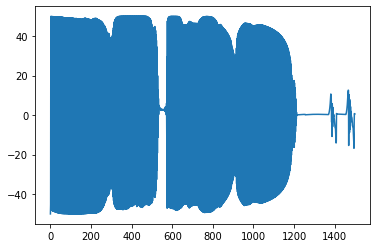

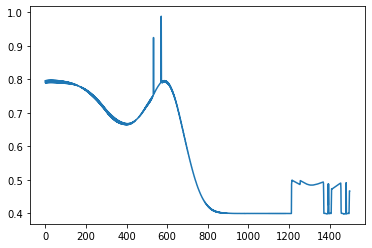

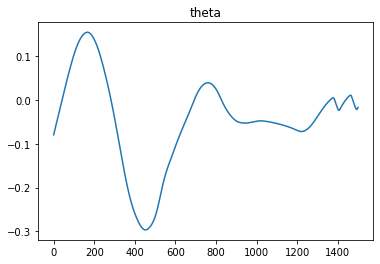

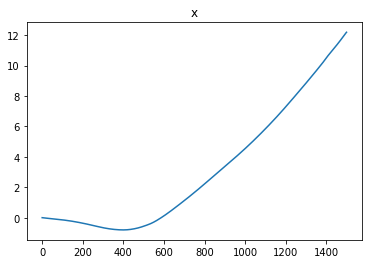

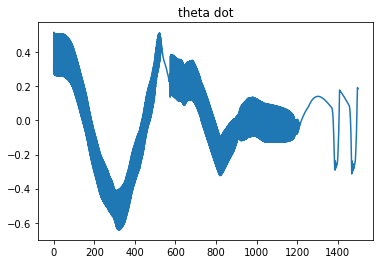

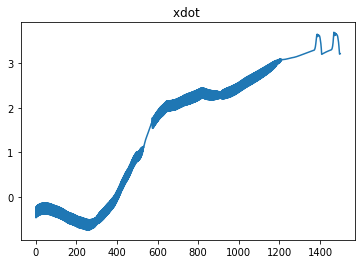

In [4]:
myenv = env
myenv.num_steps=1500

#model.gate_fn.net_fn = gate
action_hist = np.zeros((myenv.num_steps,1))
state_hist = np.zeros((myenv.num_steps, myenv.observation_space.shape[0]))
reward_hist = np.zeros((myenv.num_steps, 1))

obs = env.reset()
model.hyst_state = 0

for i in range(myenv.num_steps):
        actions, _states, = model.predict(obs)
        #actions = np.ones(1)*100
        obs, reward, done, _ = env.step(actions)        
        action_hist[i,:] = np.copy(actions)
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        #env.render()
        if done:
            break

plt.plot(action_hist)
plt.figure()
plt.plot(reward_hist)

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("x")


plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta dot")


plt.figure()
plt.plot(state_hist[:,3])
plt.title("xdot ")



print(i)
print(sum(reward_hist))


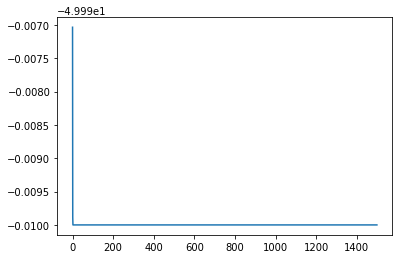